# <font color = 'Orange'> Chanda Harshita
#  <font color = 'Sky Blue'> 12001432
# <font color = 'Saffron'> RK20UPA11
    

# WALMART Superstore Sales

 ###  In this Project, we will be doing an Exploratory Data Analysis of WALMART Superstore Dataset.
 ##  This will fecilitate us in understanding and anticipating the deeper intricacies of the dataset in predicting useful insights and inferences of the Business.👽👽


## Why this Project:- 
#### As we know without the data analysis of a business we would not suceed in analyzing important data. So Data Analysis is our main focus to get useful insights from the business data, which would help in our business to grow rapidly.
#### The main idea behind selecting this dataset is to draw insights of the WALMART business, what type of customers are coming to buy the products, how will we help walmart to grow their business.
# ---------------------------------------------------------------------------------------------------------------

## This Project Belongs to Following industries:-

####    - Superstore
####    - Grocery
####    - Stationary
####    - Furnitures
####    - Eletrical Appliances
####    and so many ... 
# ---------------------------------------------------------------------------------------------------------------

## What is Our approach:-
#### -   Let’s get started to build the linear regression model based on the following steps
#### -         Import Required Packages
#### -         Load the dataset
#### -         Perform the exploratory data analysis (EDA)
#### -         Prepare the dataset for visualisation
#### -         Make predictions using the Cleaned data
# ---------------------------------------------------------------------------------------------------------------

#### Improrting Libraries which will help us to solve our problem

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing our Dataset 

In [46]:
df = pd.read_csv('sales.csv')

#### Increasing the Max No. of columns to display i.e 18

In [47]:
pd.options.display.max_columns=len(df.columns)   # len(df.columns) = 18

#### Displaying the top 5 rows of our dataset

In [48]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [49]:
df.shape

(9800, 18)

In [50]:
df.corr()

,Row_ID,Postal_Code,Sales
Row_ID,1.000000,0.013645,0.001151
Postal_Code,0.013645,1.000000,-0.024067
Sales,0.001151,-0.024067,1.000000


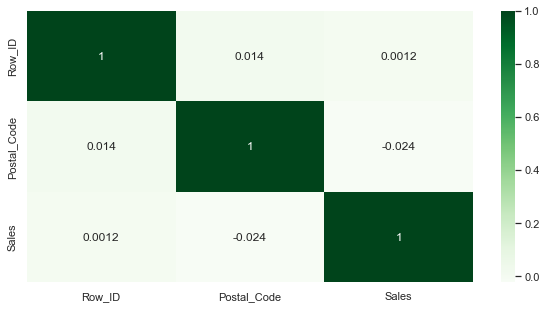

In [51]:
sns.heatmap(df.corr(),cmap='Greens',annot=True);
plt.rcParams['figure.figsize']=(10,5)

# <font color = 'Orange'> <center>Data Cleaning</center>

#### I am using this syntax to display the shape of my superstore dataset ( i.e 9800 Rows and 18 Columns )

#### Here we are checking the duplicates entries present in our dataset. if any duplicate entries exists then we will remove them from our dataset.

In [52]:
df.duplicated().sum()

0

#### So we found that there is NO null values present in our Dataset.

#### We are using this syntax to check the datatypes of aur attributes, to check whether datatype is correct to our columns or not if assigned data type is wrong then we will perform our operations and change the data type of attributes according to our analysis need.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### After analysing the datatypes, I found that all the datatypes of the attributes are correct without any datatype mis-match.

#### Now we will check the null values in our dataset.

In [54]:
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

#### After the analysis of our dataset, we found that there is a one column 'Postal Code' in which 11 values are NULL. So we will try to fix them.

## As we don't need Row_ID Column so we will simply drop that

In [55]:
df.drop('Row_ID', axis=1, inplace=True)

#### We will Store the indices of NULL values of the 'Postal_Code' Column in a List.

In [56]:
null_list = df[df['Postal_Code'].isnull()].index.tolist()
print(null_list)

[2234, 5274, 8798, 9146, 9147, 9148, 9386, 9387, 9388, 9389, 9741]


#### Verifying the null values of 'Postal_Code' by Indices

In [57]:
df.loc[null_list,['Postal_Code']]

,Postal_Code
2234,NaN
5274,NaN
8798,NaN
9146,NaN
9147,NaN
9148,NaN
9386,NaN
9387,NaN
9388,NaN
9389,NaN


In [58]:
df.loc[null_list,['Postal_Code','Region','City','State','Country']]

,Postal_Code,Region,City,State,Country
2234,NaN,East,Burlington,Vermont,United States
5274,NaN,East,Burlington,Vermont,United States
8798,NaN,East,Burlington,Vermont,United States
9146,NaN,East,Burlington,Vermont,United States
9147,NaN,East,Burlington,Vermont,United States
9148,NaN,East,Burlington,Vermont,United States
9386,NaN,East,Burlington,Vermont,United States
9387,NaN,East,Burlington,Vermont,United States
9388,NaN,East,Burlington,Vermont,United States
9389,NaN,East,Burlington,Vermont,United States


##### After displaying the complete address of All '11' Null Values Postal_Codes, We found that Address of all NULL values are Same,Which is East,Burlington,Vermont,United States.
##### So we will fill all NULL Values of Postal_Codes by the Real Postal Code of "East,Burlington,Vermont,United States" through Internet. 
#### Postal Code of "East,Burlington,Vermont,United States" is 05401 
#### Source:- https://zip.international/en/united-states/zip-5401

In [59]:
df['Postal_Code'].fillna(5401, inplace = True)
df = df.astype({"Postal_Code": int})

In [60]:
print('Postal Code NULL Values:',df.Postal_Code.isnull().sum())
df.isnull().sum()

Postal Code NULL Values: 0


Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

##### As we can see that all Null Values of our Dataframe is now fixed.

# <font color = 'magenta'> <center>Statistical Analysis</center>

In [61]:
pd.set_option('display.max_columns', 25)
df.describe(include=['object','int','float'])

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800.000000,9800,9800,9800,9800,9800,9800.000000
unique,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,CA-2018-100111,05-09-2017,26-09-2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55217.343265,NaN,NaN,NaN,NaN,NaN,230.769059
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32066.750532,NaN,NaN,NaN,NaN,NaN,626.651875
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57551.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


# <font color = 'orange'> <center>Conclusion</center>
### Here from the above statistical analysis i found that On which date maximum order were placed and how many(i.e 05-09-2017 , 38 Orders)
### And only 4 types of shipment modes are available in which standard class is maximum no of times(i.e 5859 times Standard Class)
### Which customer is placing maximum orders (i.e William Brown , WB-21850 , 35 Orders)
### Consumer segment placed more orders(i.e 5101 Orders from Consumer segment )
### All Orders are from USA because 9800 orders were placed from USA and which is the total Entries in our dataset.
### In USA, From New York city Customers are placing more orders (i.e 891 Orders from New york Alone)
### From California state maximum orders were placed (i.e 1946 orders)
### out of 4 Regions in USA, Western region customers are placing more orders (i.e 3140 orders from Western region)
### And the MAximum orders are from Office Supplies category and out of that order of Binders are maximum(i.e Out of 5909 Office supply Orders ,1492 are Binders alone.)
# <font color = 'blue'> <center>Sales</center>
## Now we come to Sales(Our Target Column)
### The Average Sales(Mean) from Superstore is 230.76 Dollars  and Highest sale is of 22638.48 Dollars and Lowest Sale is of 0.44 Dollars
# <font color = 'green'> <center>season wise orders</center>
### From Orde_Month column i analysed that More than 50% Entries or Orders are after the 9th Month(September)

## <font color = 'sky blue'>So it was the Statistical summary of the Dataset.

# <font color = 'dark yellow'> <center>Univariate and Bivariate Analysis</center>

#### Here we are splitting Month and Year from Order_Date attribute, So that we can perform some analysis on our dataset year wise.



In [62]:
import calendar
df['Order_Year'] = [int(i.split('-')[-1]) for i in df.Order_Date]
df['Order_Month'] = [int(i.split('-')[1]) for i in df.Order_Date]
df[['Order_Date','Order_Month','Order_Year']].head()


,Order_Date,Order_Month,Order_Year
0,08-11-2017,11,2017
1,08-11-2017,11,2017
2,12-06-2017,6,2017
3,11-10-2016,10,2016
4,11-10-2016,10,2016


#### I could analyse that i had data from these four years [2015,2016,2017,2018]

In [63]:
df.Order_Year.unique()

array([2017, 2016, 2015, 2018], dtype=int64)

#### We will analyse the count of orders placed year-wise

<AxesSubplot:xlabel='Order_Year', ylabel='count'>

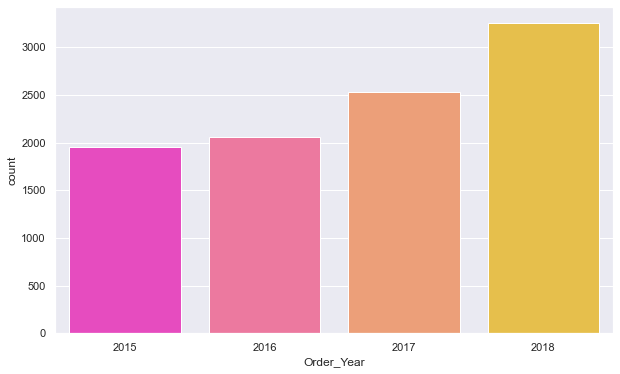

In [64]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.countplot(x="Order_Year", data=df, palette="spring")  

#### After using Countplot on Order_Year, I found that Max. no. of order were placed in the Year 2018.

### Now we will check the outliers in Sales Attribute

Total Revenue Generated by Walmart Superstore is:- Rs. 2261536.7827000003


<AxesSubplot:xlabel='Sales'>

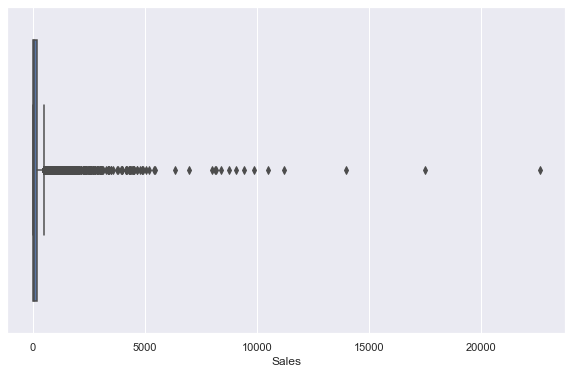

In [87]:
print('Total Revenue Generated by Walmart Superstore is:- Rs.',df['Sales'].sum())
sns.boxplot(x=df.Sales)

### We will check the total sales by month wise using Groupby method,and conlude that in which month sale is Maximum, and in which month Sale is Minimum.

In [66]:
Monthly_Sales = df.groupby('Order_Month').sum().sort_values('Sales',ascending=False)
Monthly_Sales = Monthly_Sales[['Sales']]
Monthly_Sales.reset_index(inplace=True)
Monthly_Sales

,Order_Month,Sales
0,11,350161.7110
1,12,321480.1695
2,9,300103.4117
3,10,199496.2947
4,3,197573.5872
5,8,157315.9270
6,5,154086.7237
7,6,145837.5233
8,7,145535.6890
9,4,136283.0006


### Visualising the Above Information using BarPlot


<AxesSubplot:xlabel='Order_Month', ylabel='Sales'>

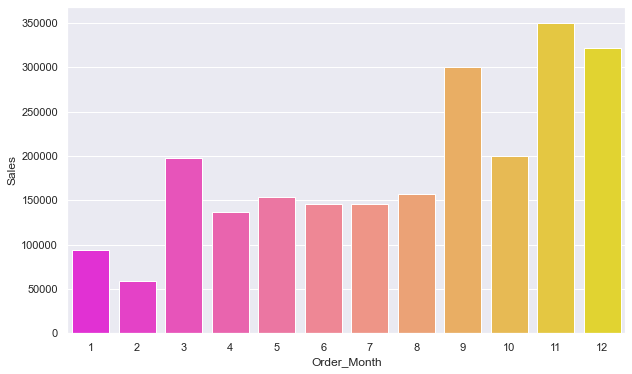

In [67]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.barplot(data=Monthly_Sales, x="Order_Month", y="Sales",palette='spring')

### From the above visualisation of Month wise sale, we analysed that Customers are Buying More Products in the Ending of the Year from the SuperStore.
### This Transparently Shows that the Sales at the end of the year increased,as most of the Festivals arrive at the ending. Christmas is believed to be one of the most celebrated festivals in the entire world which again is celebrated at the end of the year.
### And bacuse of Diwali and New Year as well.

#### Now we will see the Total Sales Region Wise, So that it will give us an idea that in which region Sales is High and Low.

<AxesSubplot:xlabel='Region', ylabel='count'>

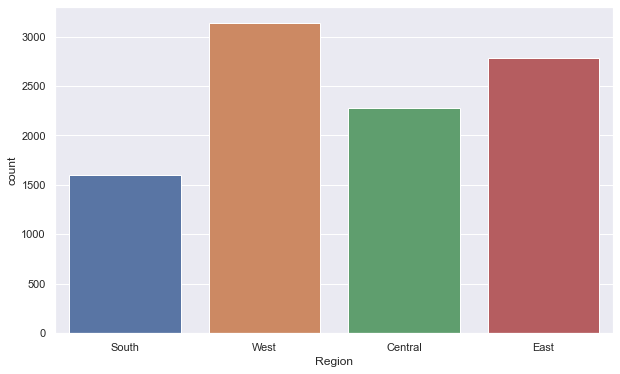

In [24]:
sns.countplot(x="Region", data=df)

### Region wise sales and group by using Segment of customer

<AxesSubplot:xlabel='Region', ylabel='count'>

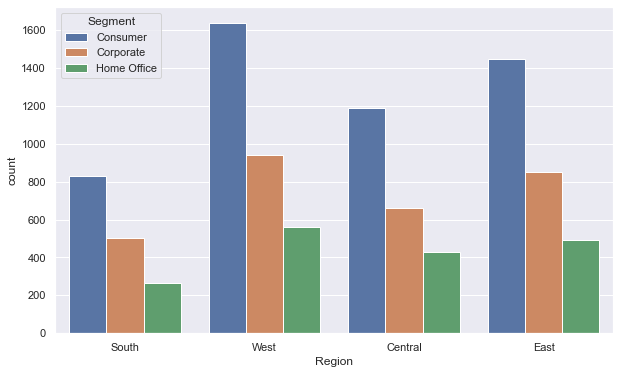

In [25]:
sns.countplot(x="Region", data=df, hue='Segment')

### Checking the percentage using pie chart to check in which region maximum orders are placed.

<AxesSubplot:ylabel='Sales'>

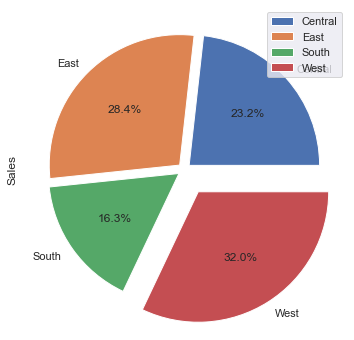

In [26]:
my_explode=(0.05,0.05,0.05,0.2)
df.groupby(['Region']).count().plot(kind='pie', y='Sales',explode=my_explode,autopct='%1.1f%%')

### As per Our analysis we found that Western Region is Giving us More Profit or High sales.

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

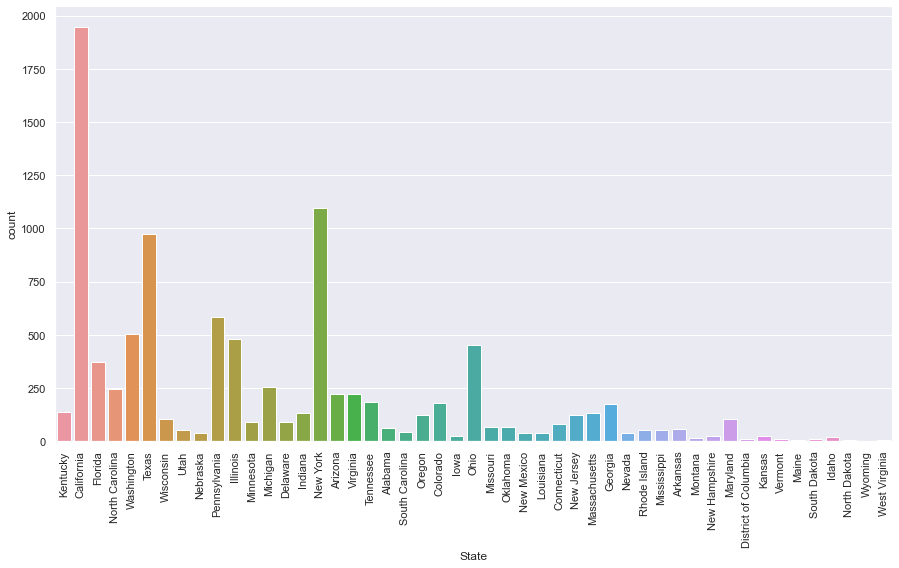

In [70]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

In [73]:
print(df['Sub_Category'].value_counts())



Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub_Category, dtype: int64


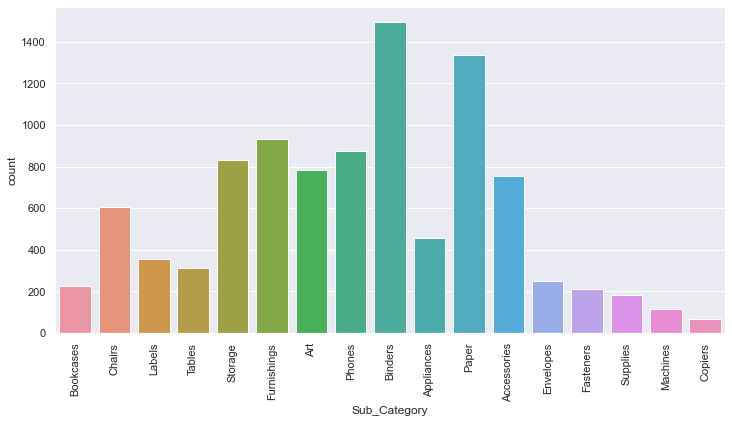

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub_Category'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

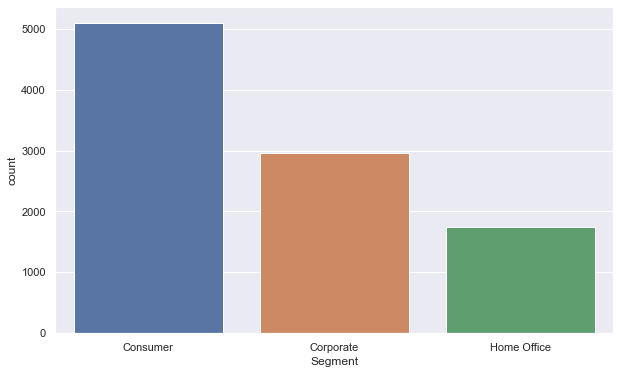

In [75]:
sns.countplot(x=df['Segment'])

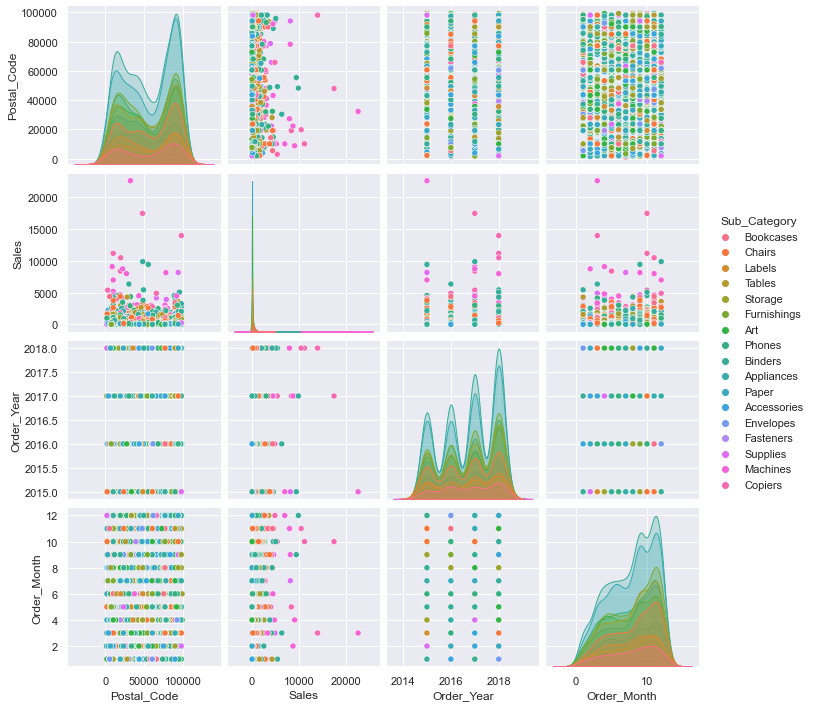

In [88]:
figsize=(15,10)
sns.pairplot(df,hue='Sub_Category')

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


C:\Users\chand\AppData\Local\Temp\ipykernel_21012\539594645.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});


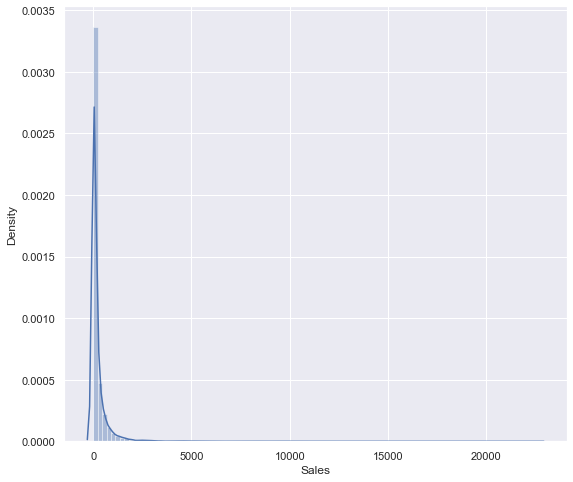

In [81]:
print(df['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(df['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});